In [1]:
# Netflix Content Strategy Analysis
# Author: Sushree Sushrita Bhanja Deo
# Description:
# This project analyzes Netflix’s content dataset to understand
# genre distribution, country-wise content availability,
# and content growth trends over time.

In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
plt.style.use('ggplot')

Matplotlib is building the font cache; this may take a moment.


In [3]:
# Load the Netflix dataset
df = pd.read_csv('../data/netflix_titles.csv')

# Display first 5 rows
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
# Check dataset shape (rows, columns)
df.shape

(8807, 12)

In [5]:
# View column names
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [6]:
# Check data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [7]:
# Check missing values in country column
df['country'].isnull().sum()

np.int64(831)

In [8]:
# Remove rows where country is missing
# Reason: Country is required for regional analysis
df = df.dropna(subset=['country'])

In [9]:
# Remove rows with missing rating or duration
df = df.dropna(subset=['rating', 'duration'])

In [10]:
# Check remaining missing values
df.isnull().sum()

show_id            0
type               0
title              0
director        2223
cast             671
country            0
date_added         9
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64

In [11]:
# Count of Movies vs TV Shows
df['type'].value_counts()

type
Movie      5687
TV Show    2283
Name: count, dtype: int64

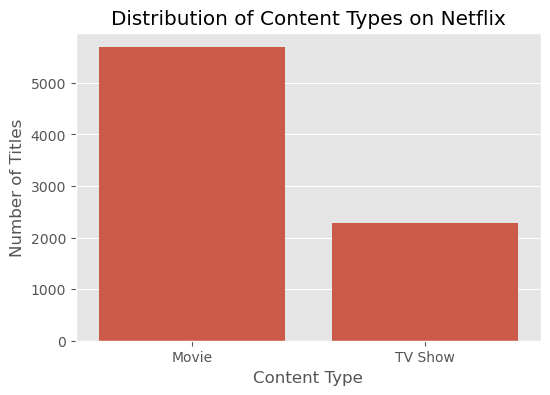

In [12]:
# Visualize content type distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='type')
plt.title('Distribution of Content Types on Netflix')
plt.xlabel('Content Type')
plt.ylabel('Number of Titles')
plt.show()

In [13]:
# Top 10 countries by content count
top_countries = df['country'].value_counts().head(10)
top_countries

country
United States     2815
India              972
United Kingdom     419
Japan              244
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: count, dtype: int64

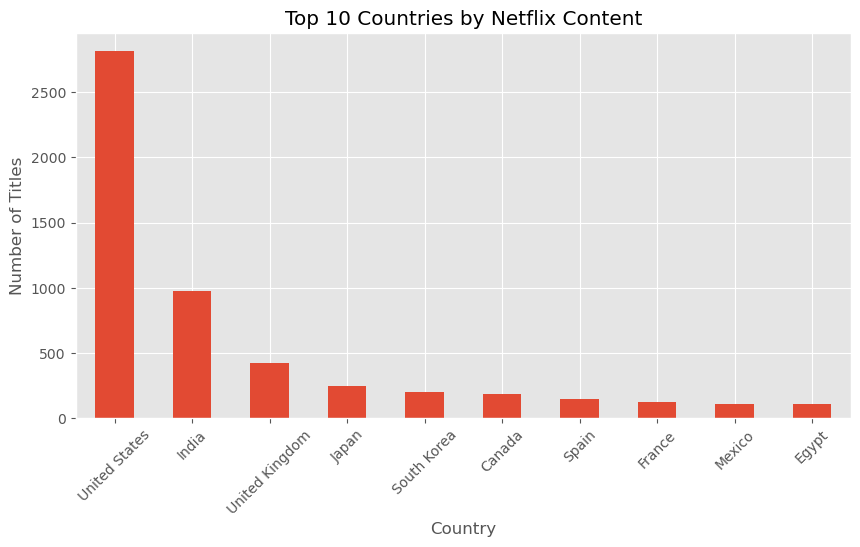

In [14]:
# Plot top 10 countries
plt.figure(figsize=(10,5))
top_countries.plot(kind='bar')
plt.title('Top 10 Countries by Netflix Content')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()

In [15]:
# Content count by release year
content_by_year = df['release_year'].value_counts().sort_index()
content_by_year.head()

release_year
1942    2
1943    3
1944    3
1945    4
1946    2
Name: count, dtype: int64

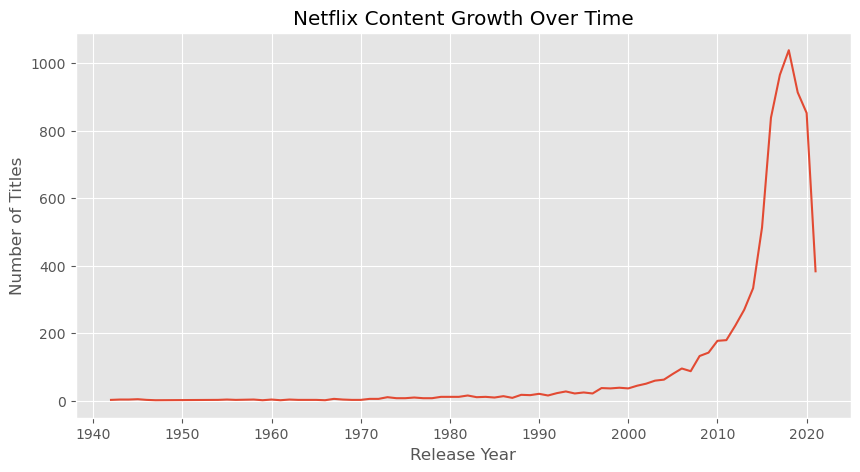

In [16]:
plt.figure(figsize=(10,5))
content_by_year.plot()
plt.title('Netflix Content Growth Over Time')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.show()

## Key Insights

- Movies constitute a larger portion of Netflix’s content library compared to TV Shows, indicating a stronger focus on movie-based entertainment.
- The United States and India are the top content-producing countries on Netflix, highlighting Netflix’s emphasis on both Western and Asian markets.
- Netflix content additions have increased significantly after 2015, reflecting aggressive expansion and investment in original and licensed content.

## Business Recommendations

- Netflix should continue investing in high-performing genres and regions such as the United States and India to maintain audience engagement.
- Expanding region-specific and international content can help attract diverse audiences and strengthen global market presence.
- Balancing movie and TV show production based on regional consumption trends could optimize content investment strategies.